In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('..\\sensor_data\\moving.txt', sep=',',header=None)
df.head()

,0,1,2,3,4
0,Rotation: -0.2148395601924067,Roll: 2.1162315928909816,Pitch: 9.605064290809215,Yaw: -34.57627504257269,Timestamp: 1754491030408
1,Rotation: -0.2035677176479651,Roll: 2.0688782558361756,Pitch: 9.919823557370634,Yaw: -34.37986995039131,Timestamp: 1754491030399
2,Rotation: -0.19381314163368124,Roll: 2.0309274482862296,Pitch: 10.234819448384144,Yaw: -34.1860378903405,Timestamp: 1754491030389
3,Rotation: -0.18510859845192273,Roll: 1.9971712384981684,Pitch: 10.54288932846463,Yaw: -33.99626711615377,Timestamp: 1754491030379
4,Rotation: -0.17731702720131137,Roll: 1.965670873277235,Pitch: 10.835982920239244,Yaw: -33.80935248328424,Timestamp: 1754491030369


In [27]:
df = df.map(lambda x: float(str(x).split(":")[-1]) if isinstance(x, str) else x)
df.columns = ["Rotation", "Roll", "Pitch", "Yaw", "Timestamp"]

In [28]:
df.head()

,Rotation,Roll,Pitch,Yaw,Timestamp
0,-0.214840,2.116232,9.605064,-34.576275,1.754491e+12
1,-0.203568,2.068878,9.919824,-34.379870,1.754491e+12
2,-0.193813,2.030927,10.234819,-34.186038,1.754491e+12
3,-0.185109,1.997171,10.542889,-33.996267,1.754491e+12
4,-0.177317,1.965671,10.835983,-33.809352,1.754491e+12


In [29]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
df.index = df['Timestamp'].values
df.drop(columns=['Timestamp'],inplace=True)
df.head()

,Rotation,Roll,Pitch,Yaw
2025-08-06 14:37:10.408,-0.214840,2.116232,9.605064,-34.576275
2025-08-06 14:37:10.399,-0.203568,2.068878,9.919824,-34.379870
2025-08-06 14:37:10.389,-0.193813,2.030927,10.234819,-34.186038
2025-08-06 14:37:10.379,-0.185109,1.997171,10.542889,-33.996267
2025-08-06 14:37:10.369,-0.177317,1.965671,10.835983,-33.809352


In [ ]:
df.shape # rows and columns in the data

(2044, 4)

In [31]:
# check missing values
df.isnull().sum()

Rotation    0
Roll        0
Pitch       0
Yaw         0
dtype: int64

In [32]:
# summary of the data
df.describe()

,Rotation,Roll,Pitch,Yaw
count,2044.000000,2044.000000,2044.000000,2044.000000
mean,-2.922081,-0.298363,24.668465,37.661672
std,3.020850,3.829462,6.059524,43.511779
min,-6.283049,-12.294913,6.923339,-34.576275
25%,-6.219409,-1.398620,21.673422,0.165503
50%,-0.316573,0.187204,24.342895,33.359149
75%,-0.072231,2.018007,29.433727,80.471112
max,-0.000086,9.231402,39.862271,110.685294


<Axes: ylabel='Density'>

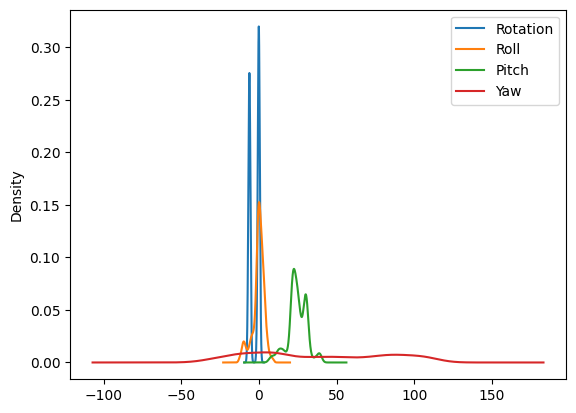

In [ ]:
df.plot(kind='kde') # Distribution comparison of each column

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

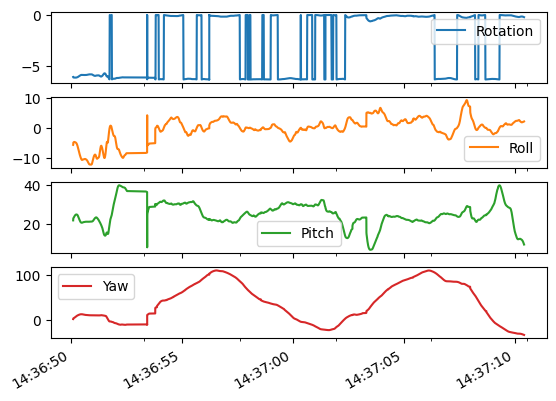

In [ ]:
df.plot(subplots=True) # comparison of all the columns

In [37]:
# Correlation between all the columns
df.corr()

,Rotation,Roll,Pitch,Yaw
Rotation,1.000000,0.688572,-0.275227,0.205142
Roll,0.688572,1.000000,-0.253104,0.360530
Pitch,-0.275227,-0.253104,1.000000,-0.111919
Yaw,0.205142,0.360530,-0.111919,1.000000
